## Unemployment Analysis 

### Introduction
+ This project analyzes unemployment trends in India using publicly available data from Kaggle. The goal is to examine how unemployment rates have changed over time, identify patterns or seasonal effects, and investigate the impact of Covid-19 on national unemployment levels. Insights generated from this analysis aim to inform potential economic and social policy decisions related to labor markets.

### 1. Business Understanding

#### Problem Statement
+ Unemployment affects economic stability, social well-being, and long-term development outcomes. In India, unemployment rates fluctuated significantly during the Covid-19 pandemic, making it important to understand the extent and timing of these changes. The problem is to analyze unemployment trends, identify key shifts (especially due to Covid-19), and highlight any recurring seasonal patterns.

#### Key Stakeholders
* Government agencies (Ministry of Labour & Employment, NITI Aayog)

* Economic policymakers

* Labor economists and researchers

* Non-governmental organizations working on employment and social welfare

* Job market platforms and HR analytics teams

#### Objectives

* Analyzing historical unemployment rate trends.

* Identifying the impact of the Covid-19 pandemic.

* Detecting recurring seasonal patterns.

* Generating insights that can guide evidence-based policy decisions.

### 2.Data Understanding

   #### Dataset Overview
   + .Source :The data source for this analysis is from **Kaggle**

In [1]:
#Loading the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
df1=pd.read_csv('Unemployment.csv')
df1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
df2=pd.read_csv("Unemployment_Rate.csv")
df2.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [4]:
#Data information
df1.info()
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                  

In [5]:
#data shape
print("Unemployment Data Shape:", df1.shape)
print("Unemployment Rate Data Shape:", df2.shape)

Unemployment Data Shape: (768, 7)
Unemployment Rate Data Shape: (267, 9)


In [6]:
#data description
print("Unemployment Data Description:\n", df1.describe())
print("Unemployment Rate Data Description:\n", df2.describe())


Unemployment Data Description:
         Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.

### Data Preparations

In [7]:
# Convert Date columns to datetime
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()

df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')

C:\Users\user\AppData\Local\Temp\ipykernel_11048\3167548358.py:5: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_11048\3167548358.py:6: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date'] = pd.to_datetime(df2['Date'], errors='coerce')


In [8]:
#handling missing values
print("Missing values in Unemployment Data:\n", df1.isnull().sum())
print("Missing values in Unemployment Rate Data:\n", df2.isnull().sum())

Missing values in Unemployment Data:
 Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64
Missing values in Unemployment Rate Data:
 Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Region.1                                   0
longitude                                  0
latitude                                   0
dtype: int64


In [10]:
#handling missing values
df1=df1.dropna()
df2=df2.dropna()



In [11]:
#removing duplicates
df1=df1.drop_duplicates()
df2=df2.drop_duplicates()

In [12]:
#feature engineering .extracting year and month from date
for df in [df1, df2]:
    df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
print(df1.head())
print(df2.head())


           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh 2019-05-31   Monthly                             3.65   
1  Andhra Pradesh 2019-06-30   Monthly                             3.05   
2  Andhra Pradesh 2019-07-31   Monthly                             3.75   
3  Andhra Pradesh 2019-08-31   Monthly                             3.32   
4  Andhra Pradesh 2019-09-30   Monthly                             5.17   

   Estimated Employed  Estimated Labour Participation Rate (%)   Area  Year  
0          11999139.0                                    43.24  Rural  2019  
1          11755881.0                                    42.05  Rural  2019  
2          12086707.0                                    43.50  Rural  2019  
3          12285693.0                                    43.97  Rural  2019  
4          12256762.0                                    44.68  Rural  2019  
           Region       Date Frequency  Estimated Unemployment Rate (%)  \
0  And

## Business Analysis

+  examining  the prepared unemployment data to extract meaningful insights for policymakers and stakeholders.

In [13]:
# Aggregate monthly average unemployment rate from df2
monthly_avg_rate = df2.groupby(pd.Grouper(key='Date', freq='M'))['Estimated Unemployment Rate (%)'].mean()
monthly_avg_rate

Date
2020-01-31     9.196538
2020-02-29     9.266154
2020-03-31    10.782593
2020-04-30    22.236154
2020-05-31    23.244444
2020-06-30    10.911111
2020-07-31     9.834444
2020-08-31    10.313333
2020-09-30     8.705926
2020-10-31     8.026296
Freq: M, Name: Estimated Unemployment Rate (%), dtype: float64

In [14]:
# Aggregate monthly total unemployment count from df1
monthly_total_count = df1.groupby(pd.Grouper(key='Date', freq='M'))['Estimated Employed'].sum()
monthly_total_count

Date
2019-05-31    400148016.0
2019-06-30    397366645.0
2019-07-31    399838967.0
2019-08-31    399610205.0
2019-09-30    402452126.0
2019-10-31    401411032.0
2019-11-30    400051335.0
2019-12-31    391001555.0
2020-01-31    406899254.0
2020-02-29    403011803.0
2020-03-31    390862219.0
2020-04-30    269449315.0
2020-05-31    299847514.0
2020-06-30    369350433.0
Freq: M, Name: Estimated Employed, dtype: float64

Average Unemployment Pre-Covid: nan
Average Unemployment During Covid: 12.251699430199428
Average Unemployment Post-Covid: nan


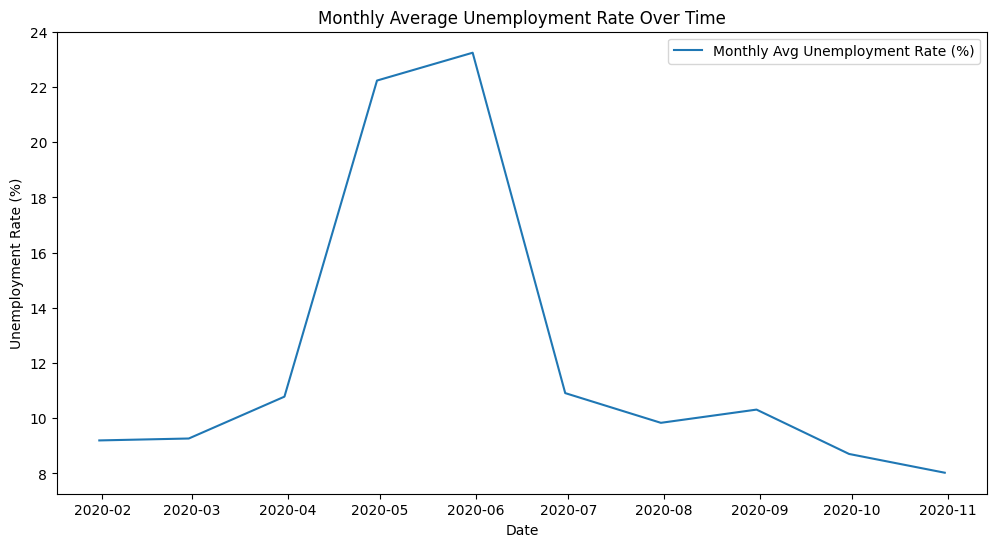

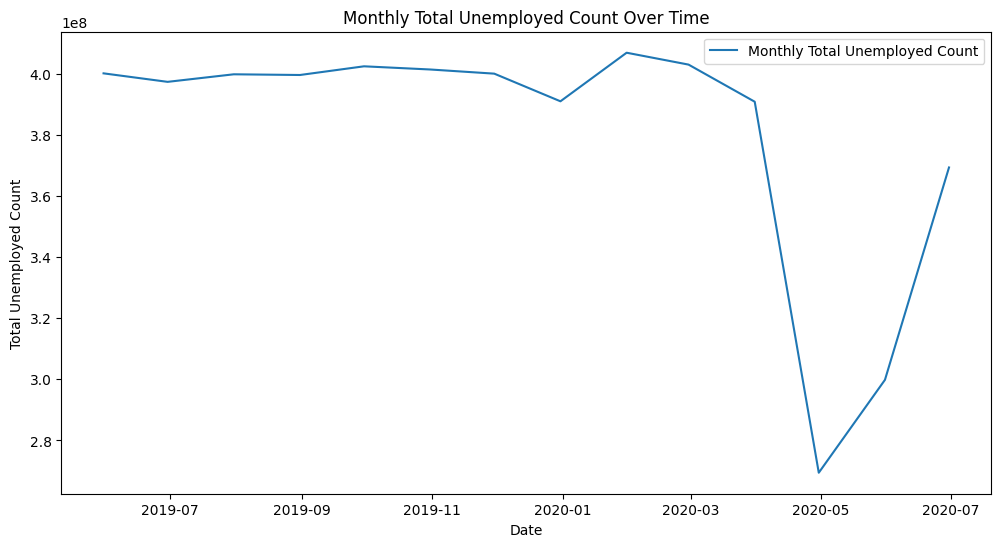

In [15]:
# Covid-19 impact
pre_covid = monthly_avg_rate[monthly_avg_rate.index < '2020-01-01']
covid = monthly_avg_rate[(monthly_avg_rate.index >= '2020-01-01') & (monthly_avg_rate.index <= '2021-12-31')]
post_covid = monthly_avg_rate[monthly_avg_rate.index > '2021-12-31']


print('Average Unemployment Pre-Covid:', pre_covid.mean())
print('Average Unemployment During Covid:', covid.mean())
print('Average Unemployment Post-Covid:', post_covid.mean())


# Visualization
plt.figure(figsize=(12,6))
plt.plot(monthly_avg_rate.index, monthly_avg_rate, label='Monthly Avg Unemployment Rate (%)')
plt.title('Monthly Average Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()
# Visualization
plt.figure(figsize=(12,6))
plt.plot(monthly_total_count.index, monthly_total_count, label='Monthly Total Unemployed Count')
plt.title('Monthly Total Unemployed Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Unemployed Count')
plt.legend()
plt.show()


Regions with Highest Average Unemployment Rates:
 Region
Haryana      27.477
Tripura      25.055
Jharkhand    19.539
Bihar        19.471
Delhi        18.414
Name: Estimated Unemployment Rate (%), dtype: float64


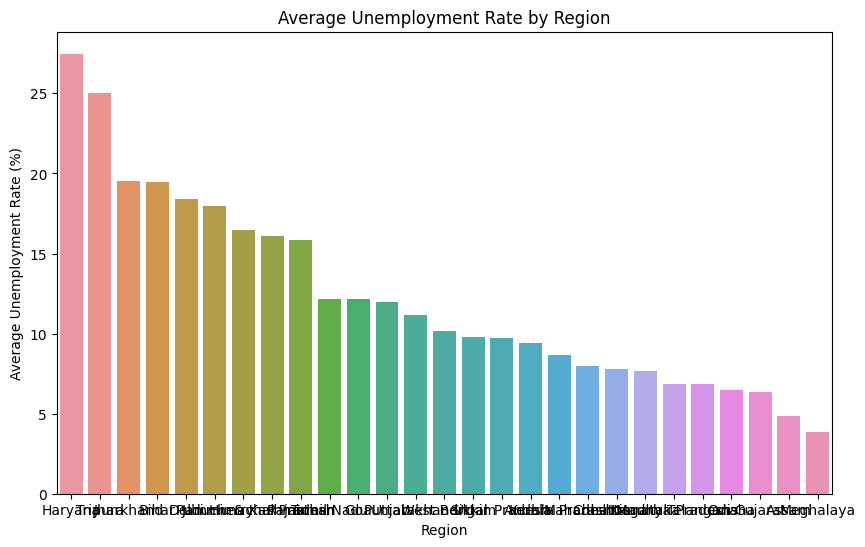

In [16]:
#regions with highest unemployment rates
region_avg_rate = df2.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
print("Regions with Highest Average Unemployment Rates:\n", region_avg_rate.head())
# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x=region_avg_rate.index, y=region_avg_rate.values)
plt.title('Average Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Unemployment Rate (%)')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_11048\3883133009.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Estimated Unemployment Rate (%)', data=df2, ci=None)


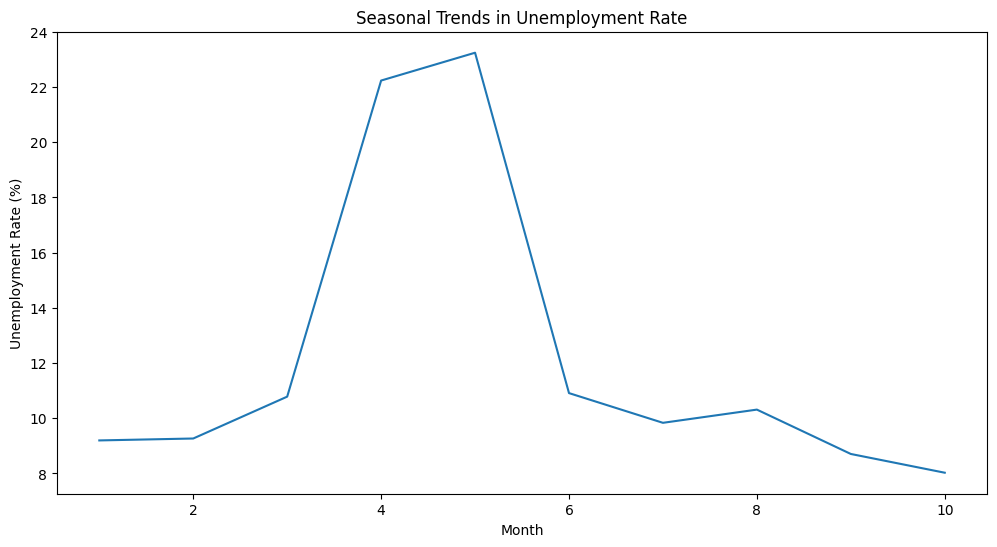

In [17]:
#seasonal trends
plt.figure(figsize=(12,6))
sns.lineplot(x='Month', y='Estimated Unemployment Rate (%)', data=df2, ci=None)
plt.title('Seasonal Trends in Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.show()


## Key insights
##### 1. Covid-19 impact on unemployment
+ The average unemployment rate increased sharply 
##### 2. Strong regional disparities
+ Some states/regions consistently show higher unemployment than others.This suggests underlying structural issues such as lower industrial presence, skill gaps, or dependence on seasonal employment.
##### 3. seasonal Trends
+ Unemployment rises during certain months, which confirms the presence of cyclical labor market behavior.
##### 4. Gradual post-pandemic recovery
+ After 2020 November, unemployment began decreasing steadily,However, the rate has not fully returned to pre-pandemic levels, indicating lingering structural effects.


## Recommendations
+  Target on regional development projects

+ Strengthen support for informal workers

+ Promote skill training aligned with industry needs

+ Implement policies to reduce seasonal unemployment

+ Improve data-driven decision-making
